SHOPS CUSTOMER SALES DATA

Features:
- Store ID
- Day of the week
- Date
- Number of customers that day 
- Open: If the store was open (1), if the store was closed (0)
- Promotion: 1 if promotion was active
- State Holidas 
- School Holidays
- Total Sales 

What do we want to achieve?
1) Prediction of the sales of the Shops --> ML model to predict the sales using features like day of the week, promotions, holidays etc.
2) Apply different models: Liniar Regression, decision tree, KNN, Random forest and analyzed which one is best for our model.  
2) Visualization 

First, we´ll analyzed LINIAR REGRESSION MODEL 

1. Import Libraries

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

2. Loading data

In [39]:
df_sales = pd.read_csv("sales.csv")

MemoryError: Unable to allocate 512. KiB for an array with shape (65536,) and data type int64

In [ ]:
df_sales['date'] = pd.to_datetime(df_sales['date'], dayfirst=True)
df_sales.sample(5)

C:\Users\macat\AppData\Local\Temp\ipykernel_22424\3667916652.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_sales['date'] = pd.to_datetime(df_sales['date'], dayfirst=True)


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
240317,330545,857,5,2013-04-26,830,1,1,0,0,6476
241400,261850,945,6,2013-05-11,369,1,0,0,0,2942
219290,509393,565,4,2015-04-02,1107,1,1,0,1,10522
51216,389230,735,4,2013-12-26,0,0,0,c,1,0
614734,37083,782,5,2013-01-11,492,1,1,0,0,5365


In [ ]:
df = pd.read_csv("real_data.csv")
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,2015-03-01,0,0,0,0,0
1,558468,27,7,2013-12-29,0,0,0,0,0
2,76950,404,3,2014-03-19,657,1,1,0,0
3,77556,683,2,2013-01-29,862,1,0,0,0
4,456344,920,3,2014-03-19,591,1,1,0,0


3. Cleaning the data for unnecessary columns

In [ ]:
print(df)

        index  store_ID  day_of_week       date  nb_customers_on_day  open  \
0      272371       415            7 2015-03-01                    0     0   
1      558468        27            7 2013-12-29                    0     0   
2       76950       404            3 2014-03-19                  657     1   
3       77556       683            2 2013-01-29                  862     1   
4      456344       920            3 2014-03-19                  591     1   
...       ...       ...          ...        ...                  ...   ...   
71200   59062       441            7 2014-10-26                    0     0   
71201  687449       377            7 2013-08-18                    0     0   
71202  207393        15            3 2014-06-11                  648     1   
71203  233378       950            2 2013-04-23                  626     1   
71204   85695       932            4 2013-11-21                  828     1   

       promotion state_holiday  school_holiday  
0             

In [ ]:
print(df_sales.columns)

Index(['Unnamed: 0', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')


In [ ]:
df_sales_clean = df_sales.drop(['date'], axis=1)

In [ ]:
df_clean= df.drop(['date'], axis=1)

In [ ]:
df_sales_clean = pd.get_dummies(df_sales_clean, drop_first =True)
df_sales_clean = df_sales_clean.reindex()

In [ ]:
df_clean = pd.get_dummies(df_clean, drop_first =True)
df_clean = df_clean.reindex()

In [ ]:
df_clean.sample(10)

,index,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c
43349,457678,225,1,542,1,0,0,False,False,False
5123,638669,861,7,0,0,0,0,False,False,False
47366,261996,774,2,635,1,0,0,False,False,False
67306,636170,611,4,517,1,1,1,False,False,False
3657,72066,1,7,0,0,0,0,False,False,False
63468,102112,834,6,530,1,0,0,False,False,False
54593,676686,614,2,1142,1,1,0,False,False,False
6397,558941,499,3,828,1,1,0,False,False,False
61061,605982,147,6,900,1,0,0,False,False,False
17254,93010,187,6,485,1,0,0,False,False,False


In [ ]:
df_sales_clean.columns

Index(['Unnamed: 0', 'store_ID', 'day_of_week', 'nb_customers_on_day', 'open',
       'promotion', 'school_holiday', 'sales', 'state_holiday_a',
       'state_holiday_b', 'state_holiday_c'],
      dtype='object')

5. Spliting the data into training sets and testing sets. This way we split 80% training and 20% testing (great PARETO rule :) so that we can evaluate how the model performs and unseen data. 

In [ ]:
X = df_sales_clean.drop('sales', axis=1)
y = df_sales_clean['sales'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(512672, 10)

In [ ]:
from numpy import asarray
data = asarray(X_train)

6. We train the Liniar Regression model 

In [ ]:
model = LinearRegression()
model.fit(data, y_train)

LinearRegression()

7. Now we want to evaluate the R2 score

In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² score (Linear Regression): {r2:.4f}")

R² score (Linear Regression): 0.8511


c:\Users\macat\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
df_clean.columns

Index(['index', 'store_ID', 'day_of_week', 'nb_customers_on_day', 'open',
       'promotion', 'school_holiday', 'state_holiday_a', 'state_holiday_b',
       'state_holiday_c'],
      dtype='object')

In [ ]:
y_real_prediction = model.predict(df_clean)

c:\Users\macat\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


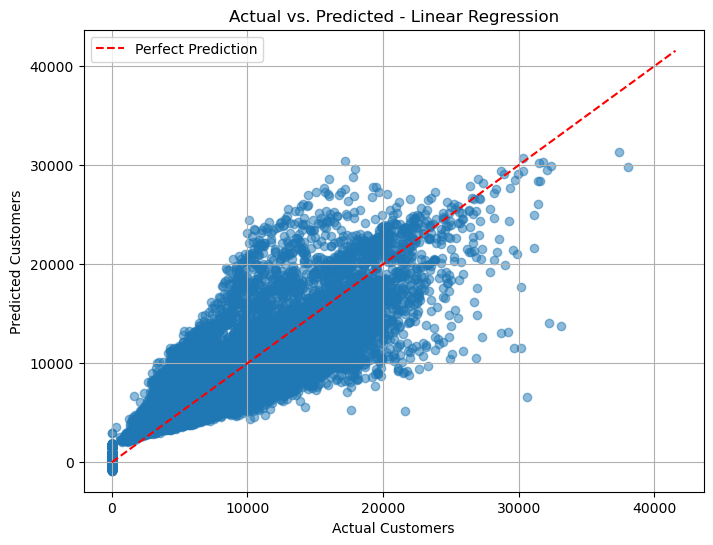

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Customers')
plt.ylabel('Predicted Customers')
plt.title('Actual vs. Predicted - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

The model explains that 3.4% of variation in the number of customers. This is very low, which means that the model is not performing well with the current features. Additionally, we can see from the visualization scatter plot that the fots are far from the line, which in this case means poor prediction of the model/performance. 
Therefore, we should try with other models like Decision Tree, KNN or Random Forest. 

In [ ]:
import pandas as pd
df_linear_preds = pd.DataFrame(y_real_prediction, columns=["Predicted_Sales_Linear"])
df_linear_preds.to_csv("predicted_sales_linear.csv", index=False)

KNN Model

1. Importing the necessary KNN libraries

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

2. As we are going to use a different model, we need to Initialize and train the KNN model 

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(data, y_train)

KNeighborsRegressor()

3. We´ll do similar to liniar regression. Make predictions on the test set and evaluate the R2 score

In [ ]:
y_pred_knn = knn_model.predict(X_test)

c:\Users\macat\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [ ]:
y_real_KNN = knn_model.predict(df_clean)

c:\Users\macat\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [ ]:
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R² score (KNN): {r2_knn:.4f}")

R² score (KNN): 0.8078


This R2 score is not that bad. It´s better than the liniar regression. We´ll test other models to see which one is the best one. 

4. We´ll visualize it to see if the model works well

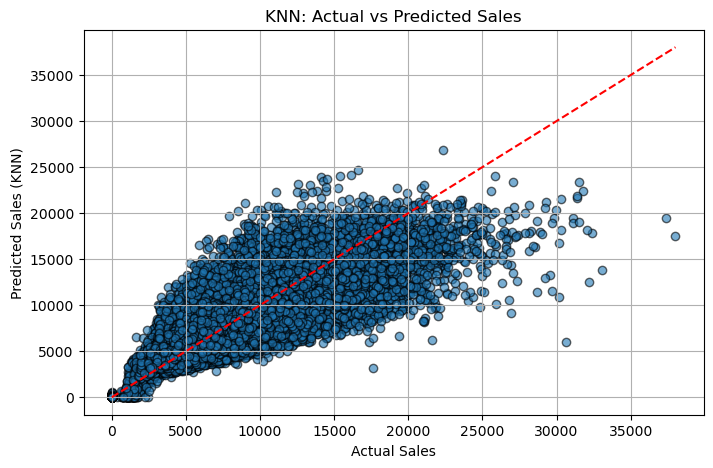

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_knn, alpha=0.6, edgecolors='k')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (KNN)')
plt.title('KNN: Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
df_knn_preds = pd.DataFrame(y_real_KNN, columns=["Predicted_Sales_KNN"])
df_knn_preds.to_csv("predicted_sales_knn.csv", index=False)

RANDOM FOREST MODEL

1. Importing the necessary libraries

In [ ]:
from sklearn.ensemble import RandomForestRegressor

2. Initialize the model 

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

3. Training the model & testing

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

4. Evaluate R2 score

In [ ]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² score (Random Forest): {r2_rf:.4f}")

R² score (Random Forest): 0.9621


5. Visualization

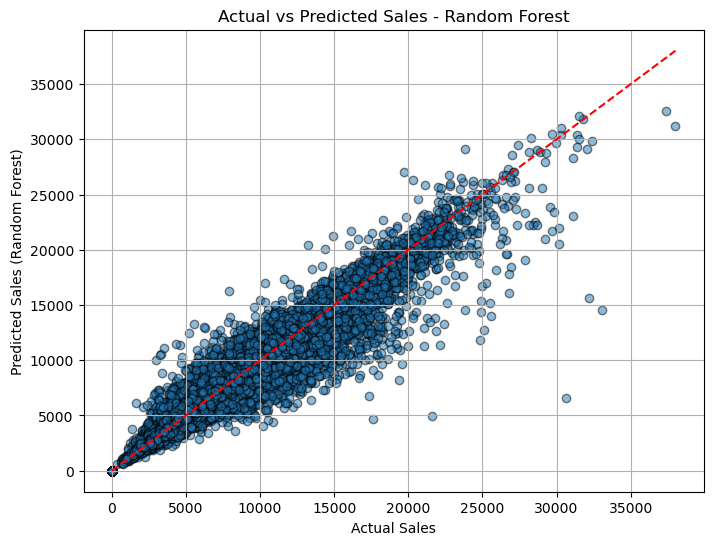

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Random Forest)")
plt.title("Actual vs Predicted Sales - Random Forest")
plt.grid(True)
plt.show()

In [40]:
import pandas as pd
df_rf_preds = pd.DataFrame(y_real_RF, columns=["Predicted_Sales_RF"])
df_rf_preds.to_csv("predicted_sales_rf.csv", index=False)

NameError: name 'y_real_RF' is not defined

Table representing the 3 R2 score

In [ ]:
import pandas as pd

r2_table = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Random Forest'],
    'R2 Score': [0.0342, 0.81, r2_rf]
})

print(r2_table)

               Model  R2 Score
0  Linear Regression  0.034200
1                KNN  0.810000
2      Random Forest  0.962065


We can clearly see that Random Forest has the best R2 score. Additionally on the visualization above, we can see that the dots are allocated and distributed in a positive and balanced way vs KNN for example. 

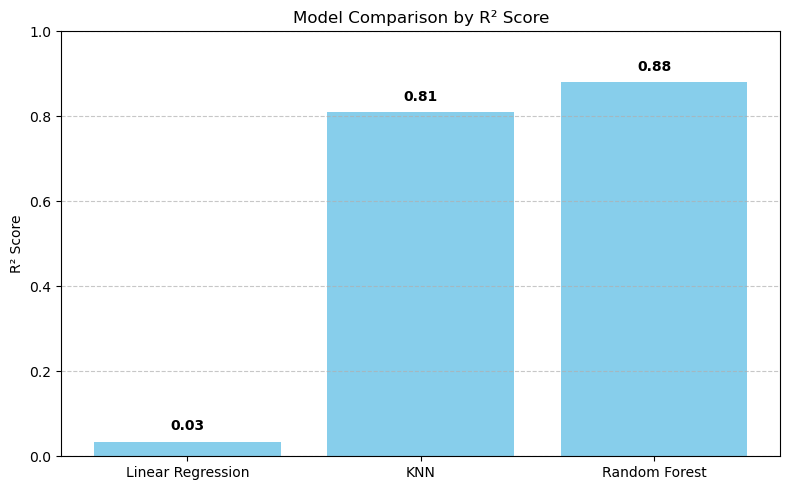

In [ ]:
import matplotlib.pyplot as plt
models = ['Linear Regression', 'KNN', 'Random Forest']
r2_scores = [0.0342, 0.81, 0.88]
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('Model Comparison by R² Score')
for bar, score in zip(bars, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f'{score:.2f}', ha='center', va='bottom', fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
